# DSPT-04 Phase 1 Project Submission

Please fill out:
* Student name: ANGEL LINAH ATUNGIRE 
* Student pace: Part Time 
* Instructor name: MARYAN MWIKALI

### Overview
In this project, I will be using exploratory data analysis to generate insights for a business stakeholder.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I was charged with exploring what types of films are currently doing the best at the box office. I then had to translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. 

We can explore the following data questions:

1. *Which film genres have the highest rating?*
   
2. *What is the relationship between budget and movie success?*
  
3. *How does the release period impact the movie performance?*
   
4. *Do audience ratings correlate with film performance?*
  

- By analyzing the revenue generated by different film genres, I can identify the genres that are most successful in terms of box office performance. I can create visualizations such as bar charts or pie charts to showcase the revenue distribution across genres.

 - I can examine the relationship between the budget allocated to a film and its box office performance. This analysis can help us determine if higher-budget films tend to generate higher revenue, or if there is a particular budget range that yields the best results. Visualizing this relationship using scatter plots or regression analysis can provide insights.
 
 - I can explore the impact of the release period (e.g., month, season) on a film's box office success. By analyzing revenue trends over time, I can identify if certain months or seasons are more favorable for film releases. Line graphs or box plots can be useful visualizations to showcase revenue patterns across different release periods.
 
  - I can examine the relationship between audience ratings (e.g., IMDb ratings) and box office success. Analyzing the correlation between these variables can help us understand if films with higher ratings tend to perform better financially. Visualizing this relationship using scatter plots or heatmaps can provide insights into audience preferences.

### Data Understanding.
The data used for this project includes relevant information about films, such as genre, budget, release date, revenue, and audience ratings. I then performed exploratory data analysis, applying various statistical techniques and data visualization methods to uncover insights. These insights can be translated into actionable recommendations for Microsoft's movie studio, helping them decide on the types of films to create based on the findings.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
#import the different datasets to be used
imdb_title_df = pd.read_csv('title.basics.csv')
imdb_ratings_df = pd.read_csv('title.ratings.csv')
bom_df = pd.read_csv('bom.movie_gross.csv')
tm_df = pd.read_csv('tmdb.movies.csv')
budget_df = pd.read_csv('tn.movie_budgets.csv')

In [3]:
#Exploration of the data after importing it.
imdb_title_df.count()

tconst             146144
primary_title      146144
original_title     146123
start_year         146144
runtime_minutes    114405
genres             140736
dtype: int64

In [4]:
imdb_title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
imdb_title_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [6]:
imdb_ratings_df.count()

tconst           73856
averagerating    73856
numvotes         73856
dtype: int64

In [7]:
imdb_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
imdb_ratings_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [9]:
tm_df.count()

Unnamed: 0           26517
genre_ids            26517
id                   26517
original_language    26517
original_title       26517
popularity           26517
release_date         26517
title                26517
vote_average         26517
vote_count           26517
dtype: int64

In [10]:
tm_df.dtypes

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [11]:
tm_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
bom_df.count()

title             3387
studio            3382
domestic_gross    3359
foreign_gross     2037
year              3387
dtype: int64

In [13]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [15]:
budget_df.count()

id                   5782
release_date         5782
movie                5782
production_budget    5782
domestic_gross       5782
worldwide_gross      5782
dtype: int64

In [16]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [17]:
budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [18]:
#Data Cleaning
tm_df = tm_df.drop('Unnamed: 0', axis = 1)
tm_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [27]:
bom_df = bom_df.drop('foreign_gross', axis = 1)
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [31]:
bom_df = bom_df.dropna()

In [32]:
bom_df.count()

title             3356
studio            3356
domestic_gross    3356
year              3356
dtype: int64

In [19]:
# Remove '$' and comma from specified columns
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace('$', '').str.replace(',', '')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace('$', '').str.replace(',', '')
budget_df['production_budget'] = budget_df['production_budget'].str.replace('$', '').str.replace(',', '')

#change the date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date']).dt.strftime('%Y-%m-%d')

# Print the updated DataFrame
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [20]:
#change the datatypes of the columns
budget_df['domestic_gross'] = budget_df['domestic_gross'].astype('int')
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].astype('int64')
budget_df['production_budget'] = budget_df['production_budget'].astype('int')

# Change the date format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'], errors='coerce')

#Print the updated DataFrame
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


### Genres with the Highest Rating
For this question, I answered using the number of votes and the average rating from the votes and ratings data frame that wa created in the cells above

In [21]:
#Accessing the Data required
imdbdf = pd.merge(imdb_title_df, imdb_ratings_df, on='tconst')
imdbdf.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [22]:
votes_and_ratings_df = imdbdf[['genres', 'averagerating', 'numvotes']]
votes_and_ratings_df.head()

,genres,averagerating,numvotes
0,"Action,Crime,Drama",7.0,77
1,"Biography,Drama",7.2,43
2,Drama,6.9,4517
3,"Comedy,Drama",6.1,13
4,"Comedy,Drama,Fantasy",6.5,119


In [23]:
votes_df = imdbdf[['genres', 'primary_title', 'numvotes']].sort_values(by='numvotes', ascending=False)
votes_df.head()

,genres,primary_title,numvotes
2387,"Action,Adventure,Sci-Fi",Inception,1841066
2241,"Action,Thriller",The Dark Knight Rises,1387769
280,"Adventure,Drama,Sci-Fi",Interstellar,1299334
12072,"Drama,Western",Django Unchained,1211405
325,"Action,Adventure,Sci-Fi",The Avengers,1183655


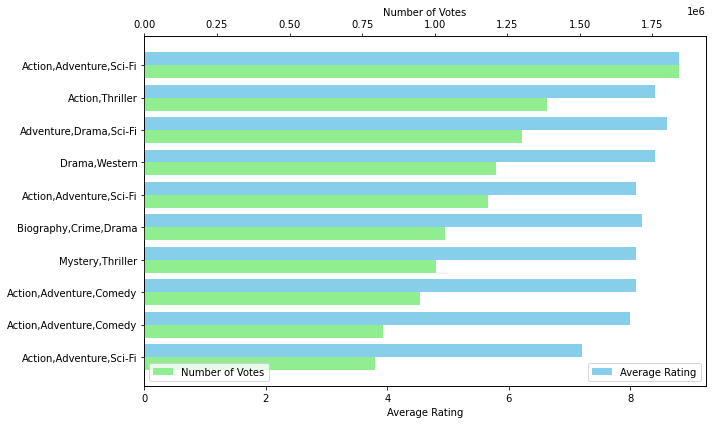

In [24]:
# Sort the DataFrame by number of votes 
votes_and_ratings_sorted_df = votes_and_ratings_df.sort_values('numvotes', ascending=False)
#select the top 10 genres
top_genres = votes_and_ratings_sorted_df.head(10)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twiny()

# Create the bidirectional bar chart
bar_width = 0.4
bar_spacing = 0.2
indices = np.arange(len(top_genres))
rating_bars = ax1.barh(indices - bar_spacing, top_genres['averagerating'], bar_width, label='Average Rating', color='skyblue')
votes_bars = ax2.barh(indices + bar_spacing, top_genres['numvotes'], bar_width, label='Number of Votes', color='lightgreen')

# Set y-axis labels and ticks
ax1.set_yticks(indices)
ax1.set_yticklabels(top_genres['genres'])
ax1.invert_yaxis()

# Set x-axis labels
ax1.set_xlabel('Average Rating')
ax2.set_xlabel('Number of Votes')

# Set legends
ax1.legend(loc='lower right')
ax2.legend(loc='lower left')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

From the bar chart above, we can see that some genre sets appear more that once which is not an accurate representation of the data and does not answer the question in the right way. I needed to find a way to make the genres appear once and i decided to use the number of votes because ratings can be subjective

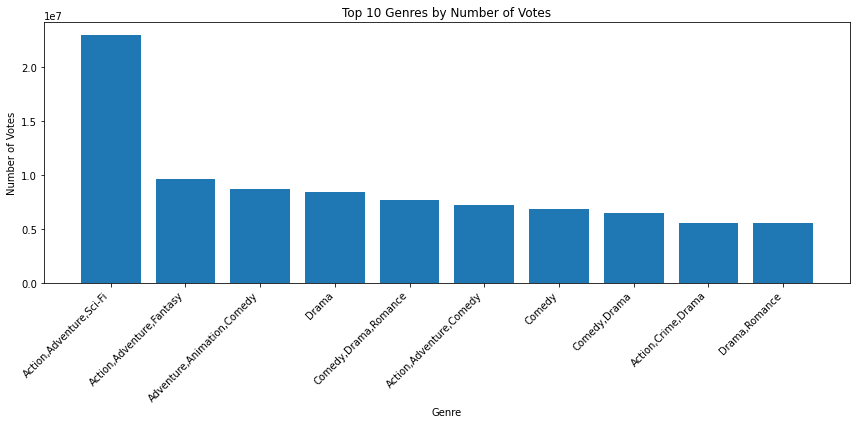

In [25]:
# Create a dictionary that will contain theh genres and the total number of votes
genres_dict = {}
for _, row in votes_df.iterrows():
    genres = row['genres']
    num_votes = row['numvotes']
    if genres in genres_dict:
        genres_dict[genres] += num_votes
    else:
        genres_dict[genres] = num_votes
        
#sort the dictionary in descending order of number of votes
sorted_genres = sorted(genres_dict.items(), key=lambda x:x[1], reverse=True)
# the output is a list of tuples

# Extract the Top 10 Genres and plot them
top_10_genres = sorted_genres[:10]
genres, num_votes = zip(*top_10_genres)

plt.figure(figsize=(12, 6))
plt.bar(genres, num_votes)
plt.xlabel('Genre')
plt.ylabel('Number of Votes')
plt.title('Top 10 Genres by Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Answering the Question
The genres with the highest rating are Action, Adventure and Sci-Fi. 

### Relationship Between Budget and Movie Success
The measure of movie success in this question is done by calculating the profit. Finding the correlation between the production budget and the profit, domestic gross and the worldwide gross

In [33]:
# Measuring performance using profit.
# Calculate profit using production_budget, domestic_gross, and worldwide_gross
budget_df['profit'] = budget_df['domestic_gross'] + budget_df['worldwide_gross'] - budget_df['production_budget']

# Print the updated DataFrame
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129


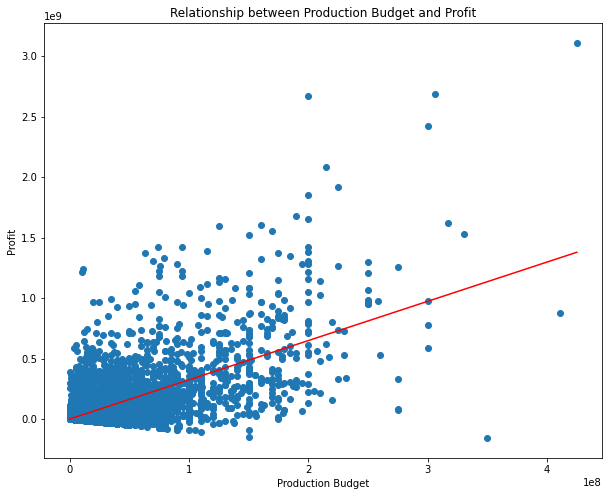

In [35]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(budget_df['production_budget'], budget_df['profit'])
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.title('Relationship between Production Budget and Profit')

# Add a trendline (optional)
z = np.polyfit(budget_df['production_budget'], budget_df['profit'], 1)
p = np.poly1d(z)
plt.plot(budget_df['production_budget'], p(budget_df['production_budget']), color='red')

# Show the plot
plt.show()

In [36]:
correlation_profit = budget_df['production_budget'].corr(budget_df['profit'])
print(f"The correlation between the production budget and the profit is {correlation_profit}")

The correlation between the production budget and the profit is 0.6435798749670003


The scatter plot above shows a moderate correlation between the production budget and the profit. From this analysis we can conclude that a higher production budget is more likely to return greater success for the film

In [37]:
prodxprof = budget_df[['movie', 'production_budget', 'profit']].sort_values(by='profit', ascending=False)
prodxprof.head()

,movie,production_budget,profit
0,Avatar,425000000,3111852904
5,Star Wars Ep. VII: The Force Awakens,306000000,2683973445
42,Titanic,200000000,2667572339
6,Avengers: Infinity War,300000000,2426949682
33,Jurassic World,215000000,2086125489


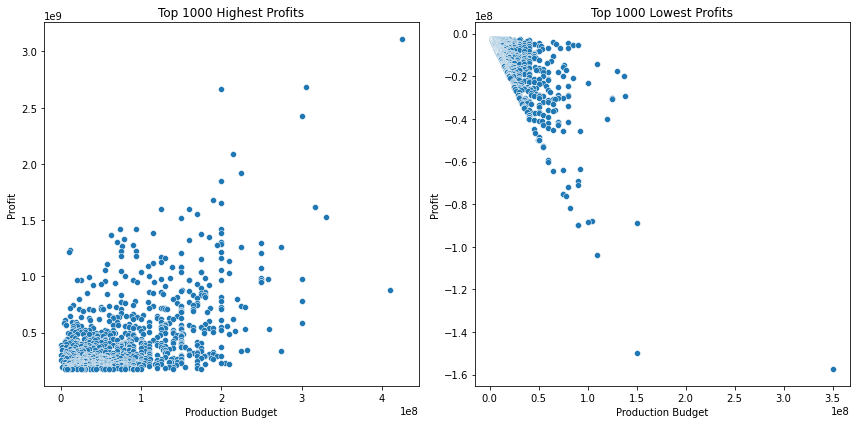

In [38]:
# Sort the DataFrame by profit in descending order
sorted_profits = prodxprof.sort_values('profit', ascending=False)

# Extract the top 10 highest profits
top_1000_high_profits = sorted_profits.head(1000)

# Extract the top 10 lowest profits
top_1000_low_profits = sorted_profits.tail(1000)

# Create subplots with two graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph: 10 highest profits
sns.scatterplot(ax=axes[0], x=top_1000_high_profits['production_budget'], y=top_1000_high_profits['profit'])
axes[0].set_xlabel('Production Budget')
axes[0].set_ylabel('Profit')
axes[0].set_title('Top 1000 Highest Profits')

# Plot the second graph: 10 lowest profits
sns.scatterplot(ax=axes[1], x=top_1000_low_profits['production_budget'], y=top_1000_low_profits['profit'])
axes[1].set_xlabel('Production Budget')
axes[1].set_ylabel('Profit')
axes[1].set_title('Top 1000 Lowest Profits')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

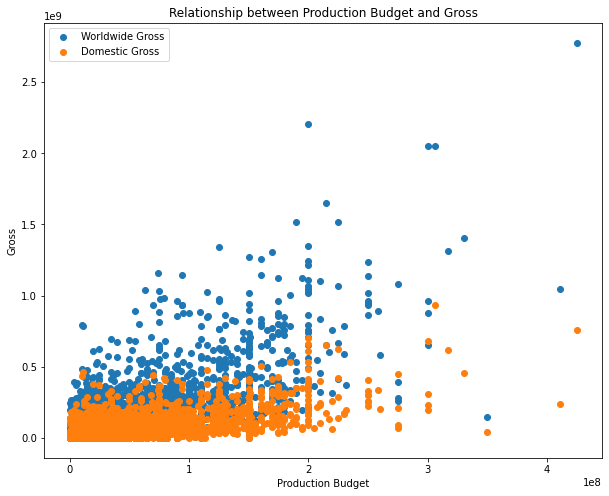

In [106]:
# Visualize the relationship between production budget and gross types
plt.figure(figsize=(10, 8))
plt.scatter(budget_df['production_budget'], budget_df['worldwide_gross'], label='Worldwide Gross')
plt.scatter(budget_df['production_budget'], budget_df['domestic_gross'], label='Domestic Gross')
plt.xlabel('Production Budget')
plt.ylabel('Gross')
plt.title('Relationship between Production Budget and Gross')
plt.legend()
plt.show()

In [39]:
correlation_domestic = budget_df['production_budget'].corr(budget_df['domestic_gross'])
correlation_worldwide = budget_df['production_budget'].corr(budget_df['worldwide_gross'])


print(f"The correlation between domestic gross and the production budget is {correlation_domestic} while the correlation between worldwide gross and the production budget is {correlation_worldwide}")

The correlation between domestic gross and the production budget is 0.6856818396752733 while the correlation between worldwide gross and the production budget is 0.7483059765694753


### Release Period Vs Performance

In [40]:
budget_df['month'] = budget_df['release_date'].dt.month
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3111852904,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,876127750,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1531419831,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1619903129,12


In [41]:
avg_prof_date = budget_df.groupby(budget_df['month'].apply(lambda x: 'Jan-Jun' if x <= 6 else 'Jul-Dec'))['profit'].mean()
avg_prof_date_df = pd.DataFrame(avg_prof_date).reset_index()
avg_prof_date_df['profit'] = avg_prof_date_df['profit'].astype('int64')
avg_prof_date_df

,month,profit
0,Jan-Jun,106588400
1,Jul-Dec,97976439


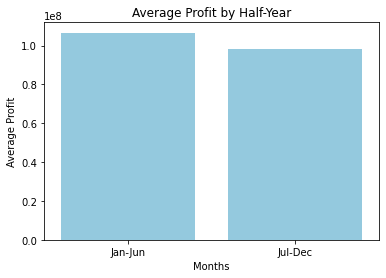

In [42]:
sns.barplot(x='month', y='profit', data=avg_prof_date_df, color = 'skyblue')
plt.xlabel('Months')
plt.ylabel('Average Profit')
plt.title('Average Profit by Half-Year')
plt.show()

The release period affects the performance of films. From the above analysis and bar chart, statistics show that films released in the first half of the year have a higher average profit than films released in the second half of the year.

### Audience Rating Vs Perfomance

In [43]:
popularity_df = tm_df[['title', 'popularity']].sort_values(by='popularity', ascending=False)
popularity_df.head()

,title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289


In [44]:
popularity_df.rename(columns = {'title' : 'movie'}, inplace = True)
popularity_df.head()

,movie,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289


In [45]:
profit_df = budget_df[[ 'movie', 'profit']].sort_values(by='profit', ascending=False)
profit_df.head()

,movie,profit
0,Avatar,3111852904
5,Star Wars Ep. VII: The Force Awakens,2683973445
42,Titanic,2667572339
6,Avengers: Infinity War,2426949682
33,Jurassic World,2086125489


In [46]:
popxprof = pd.merge(popularity_df, profit_df, on='movie')
popxprof.head()

,movie,popularity,profit
0,Avengers: Infinity War,80.773,2426949682
1,John Wick,78.123,89272836
2,The Hobbit: The Battle of the Five Armies,53.783,950697409
3,The Avengers,50.289,1916215444
4,The Avengers,50.289,11970832


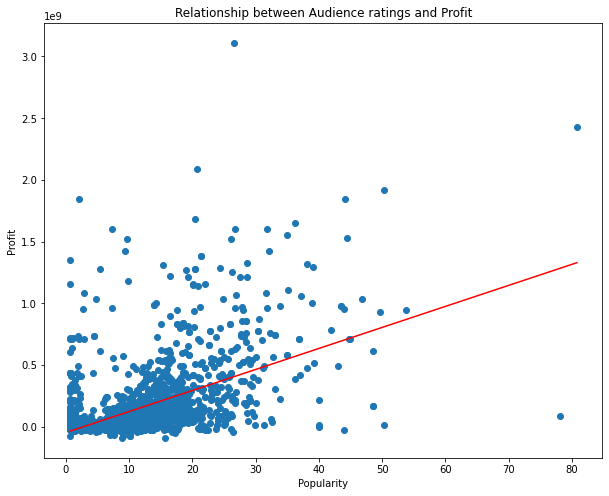

In [47]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(popxprof['popularity'], popxprof['profit'])
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.title('Relationship between Audience ratings and Profit')

# Add a trendline (optional)
z = np.polyfit(popxprof['popularity'], popxprof['profit'], 1)
p = np.poly1d(z)
plt.plot(popxprof['popularity'], p(popxprof['popularity']), color='red')

# Show the plot
plt.show()

In [48]:
#Calculate the correlation between the popularity and profit
correlation_popularity = popxprof['popularity'].corr(popxprof['profit'])
correlation_popularity

0.5353726817334188